In [2]:
# 第一个单元格 - 导入必要的库
import torch
import time
import os
import pickle
from CLEAN.dataloader import *
from CLEAN.model import *
from CLEAN.utils import *
import torch.nn as nn
from CLEAN.distance_map import get_dist_map
import torch.nn.functional as F
import random
from CLEAN.infer import *
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, cohen_kappa_score, matthews_corrcoef

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
def format_esm2(a):
    if type(a) == dict:
        # 检查可用的层
        if 33 in a['mean_representations']:
            return a['mean_representations'][33]
        # 如果33层不存在，使用最后一层
        last_layer = max(a['mean_representations'].keys())
        return a['mean_representations'][last_layer]
    return a

In [2]:
# 读取非酶数据
no_enz_path = '/nfs/hb236/dhy/app/data/esm_data_NoEnzyme'
no_enz_files = [os.path.join(no_enz_path, f) for f in os.listdir(no_enz_path) if f.endswith('.pt')]
no_enz_data = []

print(f"正在读取非酶数据，共有{len(no_enz_files)}个文件...")
for file in no_enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        no_enz_data.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

no_enz_data = torch.stack(no_enz_data) if no_enz_data else torch.tensor([])
no_enz_labels = torch.zeros(no_enz_data.shape[0])

# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_split100'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_data = []

print(f"正在读取酶数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_data.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_data = torch.stack(enz_data) if enz_data else torch.tensor([])
enz_labels = torch.ones(enz_data.shape[0])

正在读取非酶数据，共有262033个文件...
正在读取酶数据，共有227362个文件...


In [ ]:
# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_test'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_test = []

print(f"正在读取pet数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_test.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_test = torch.stack(enz_test) if enz_test else torch.tensor([])
# enz_labels = torch.ones(enz_test.shape[0])

正在读取pet数据，共有7个文件...


In [4]:
# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_apm'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_test2 = []

print(f"正在读取amp数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_test2.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_test2 = torch.stack(enz_test2) if enz_test2 else torch.tensor([])
# enz_test2_labels = torch.ones(enz_test2_test2.shape[0])

正在读取amp数据，共有10个文件...


In [5]:
# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_rdrp'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_test_rdrp = []

print(f"正在读取rdrp数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_test_rdrp.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_test_rdrp = torch.stack(enz_test_rdrp) if enz_test_rdrp else torch.tensor([])
# enz_labels = torch.ones(enz_test_rdrp.shape[0])

正在读取rdrp数据，共有8302个文件...


In [6]:
# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_rdrp2'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_test_rdrp2 = []

print(f"正在读取rdrp2数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_test_rdrp2.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_test_rdrp2 = torch.stack(enz_test_rdrp2) if enz_test_rdrp2 else torch.tensor([])
# enz_labels = torch.ones(enz_test_rdrp2.shape[0])

正在读取rdrp2数据，共有1838个文件...


In [18]:
# 读取酶数据
enz_path = '/nfs/hb236/dhy/app/data/esm_data_uniprot_metagenome'
enz_files = [os.path.join(enz_path, f) for f in os.listdir(enz_path) if f.endswith('.pt')]
enz_test_uniprot_metagenome = []

print(f"正在读取uniprot_metagenome数据，共有{len(enz_files)}个文件...")
for file in enz_files:
    try:
        data = torch.load(file)
        # 使用format_esm2函数处理数据
        vector = format_esm2(data)
        enz_test_uniprot_metagenome.append(vector)
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

enz_test_uniprot_metagenome = torch.stack(enz_test_uniprot_metagenome) if enz_test_uniprot_metagenome else torch.tensor([])
# enz_labels = torch.ones(enz_test_uniprot_metagenome.shape[0])

# 获取序列对应的Entry号
def get_entry_names(file_path):
    entry_names = []
    for file in os.listdir(file_path):
        if file.endswith('.pt'):
            # 从文件名中提取Entry号（假设文件名格式为"Entry.pt"）
            entry_name = os.path.splitext(file)[0]
            entry_names.append(entry_name)
    return entry_names

# 获取各个数据集的Entry号
uniprot_metagenome_entries = get_entry_names('/nfs/hb236/dhy/app/data/esm_data_uniprot_metagenome')

print(f"uniprot_metagenome数据集Entry数量: {len(uniprot_metagenome_entries)}")

# 将Entry号保存到对应的数据集中
uniprot_metagenome_label = uniprot_metagenome_entries


正在读取uniprot_metagenome数据，共有198个文件...
uniprot_metagenome数据集Entry数量: 198


In [19]:
len(uniprot_metagenome_label)

198

In [6]:
# 将酶和非酶数据集拼接在一起
print(f"酶数据形状: {enz_data.shape}")
print(f"非酶数据形状: {no_enz_data.shape}")

# 拼接数据
all_data = torch.cat([enz_data, no_enz_data], dim=0)
# 拼接标签
all_labels = torch.cat([enz_labels, no_enz_labels], dim=0)

print(f"合并后的数据形状: {all_data.shape}")
print(f"合并后的标签形状: {all_labels.shape}")
print(f"标签分布: 酶({torch.sum(all_labels == 1).item()})，非酶({torch.sum(all_labels == 0).item()})")

# 查看一个样本向量
print(all_data[0])

酶数据形状: torch.Size([227362, 2560])
非酶数据形状: torch.Size([262033, 2560])
合并后的数据形状: torch.Size([489395, 2560])
合并后的标签形状: torch.Size([489395])
标签分布: 酶(227362)，非酶(262033)
tensor([-0.0683, -0.0124,  0.0208,  ..., -0.0924, -0.3711, -0.0022])


In [7]:
all_labels

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [8]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

print("划分训练集和测试集...")
X_train, X_test, y_train, y_test = train_test_split(
    all_data.numpy(), all_labels.numpy(), 
    test_size=0.2, 
    random_state=42, 
    stratify=all_labels.numpy()  # 确保训练集和测试集中的类别比例一致
)

print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")
print(f"训练集标签分布: 酶({np.sum(y_train == 1)})，非酶({np.sum(y_train == 0)})")
print(f"测试集标签分布: 酶({np.sum(y_test == 1)})，非酶({np.sum(y_test == 0)})")

# 创建XGBoost模型
print("训练XGBoost模型...")
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 训练模型
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 评估模型性能
print("\n模型评估结果:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分数: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

划分训练集和测试集...
训练集形状: (391516, 2560), 测试集形状: (97879, 2560)
训练集标签分布: 酶(181890)，非酶(209626)
测试集标签分布: 酶(45472)，非酶(52407)
训练XGBoost模型...



模型评估结果:
准确率 (Accuracy): 0.9643
精确率 (Precision): 0.9680
召回率 (Recall): 0.9548
F1分数: 0.9614
ROC AUC: 0.9930


In [9]:
# 创建保存模型的目录
import os
save_dir = './'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 保存XGBoost模型
model_path = os.path.join(save_dir, 'xgboost_model.json')
xgb_model.save_model(model_path)
print(f"模型已保存到: {model_path}")

模型已保存到: ./xgboost_model.json


In [5]:
# 从本地加载XGBoost模型
import xgboost as xgb
import os
loaded_model = xgb.XGBClassifier()

save_dir = './'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, 'xgboost_model.json')
loaded_model.load_model(model_path)
print(f"模型已从 {model_path} 加载")

模型已从 ./xgboost_model.json 加载


In [6]:
loaded_model.predict(enz_test_uniprot_metagenome)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [7]:
enz_test_uniprot_metagenome.shape

torch.Size([198, 2560])

In [7]:
loaded_model.predict_proba(enz_test_uniprot_metagenome)[:, 0]

array([0.9920569 , 0.99699897, 0.9946894 , 0.99433184, 0.99576765,
       0.99932057, 0.99822277, 0.9969265 , 0.98691225, 0.9968091 ,
       0.9984516 , 0.9899169 , 0.98756015, 0.98070353, 0.9923649 ,
       0.9982121 , 0.98875153, 0.9923993 , 0.9913294 , 0.9842237 ,
       0.99751955, 0.9885862 , 0.9944403 , 0.9689545 , 0.996054  ,
       0.99777716, 0.94495314, 0.9983009 , 0.9967966 , 0.8531102 ,
       0.99760205, 0.9950508 , 0.9632016 , 0.99294263, 0.44164383,
       0.98678887, 0.99715084, 0.9779404 , 0.9860709 , 0.9923388 ,
       0.9956226 , 0.8136802 , 0.9924874 , 0.9809298 , 0.5248399 ,
       0.99555314, 0.9965914 , 0.9939993 , 0.9828821 , 0.98987764,
       0.96127635, 0.99687076, 0.9981663 , 0.994121  , 0.99762166,
       0.99267095, 0.99315166, 0.9570514 , 0.9957206 , 0.9875065 ,
       0.99681944, 0.8935343 , 0.9893675 , 0.97333115, 0.96310234,
       0.9880881 , 0.9949842 , 0.9976774 , 0.8576577 , 0.26012206,
       0.9952509 , 0.9581888 , 0.8765683 , 0.9940291 , 0.84874

In [8]:
xgb_model = loaded_model

In [12]:
y_pred_pet = xgb_model.predict(enz_test)
y_pred_proba_pet = xgb_model.predict_proba(enz_test)[:, 1]

In [13]:
y_pred_pet

array([1, 1, 1, 1, 1, 1, 1])

In [14]:
y_pred_proba_pet

array([0.9149272 , 0.6716061 , 0.8769998 , 0.84222835, 0.7197086 ,
       0.85387605, 0.7205231 ], dtype=float32)

In [11]:
y_pred_amp = xgb_model.predict(enz_test2)
y_pred_proba_amp = xgb_model.predict_proba(enz_test2)[:, 1]

In [12]:
y_pred_amp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# 获取预测结果和置信度
y_pred_uniprot_metagenome = xgb_model.predict(enz_test_uniprot_metagenome)
y_pred_proba_uniprot_metagenome = xgb_model.predict_proba(enz_test_uniprot_metagenome)[:, 1]

# 创建包含预测结果的DataFrame
results_df = pd.DataFrame({
    'Entry': uniprot_metagenome_label,
    '预测标签': y_pred_uniprot_metagenome,
    '预测置信度': y_pred_proba_uniprot_metagenome
})


In [21]:
results_df

,Entry,预测标签,预测置信度
0,Q5XEB2,0,0.007943
1,Q5XDY6,0,0.003001
2,Q5XDD9,0,0.005311
3,Q5X9E3,0,0.005668
4,Q5X9M6,0,0.004232
...,...,...,...
193,Q5XDI2,1,0.819973
194,Q5X9F3,1,0.842584
195,Q5XA89,1,0.826382
196,Q5XAH1,0,0.074946


预测结果统计:
标签 0: 151 个样本
标签 1: 47 个样本


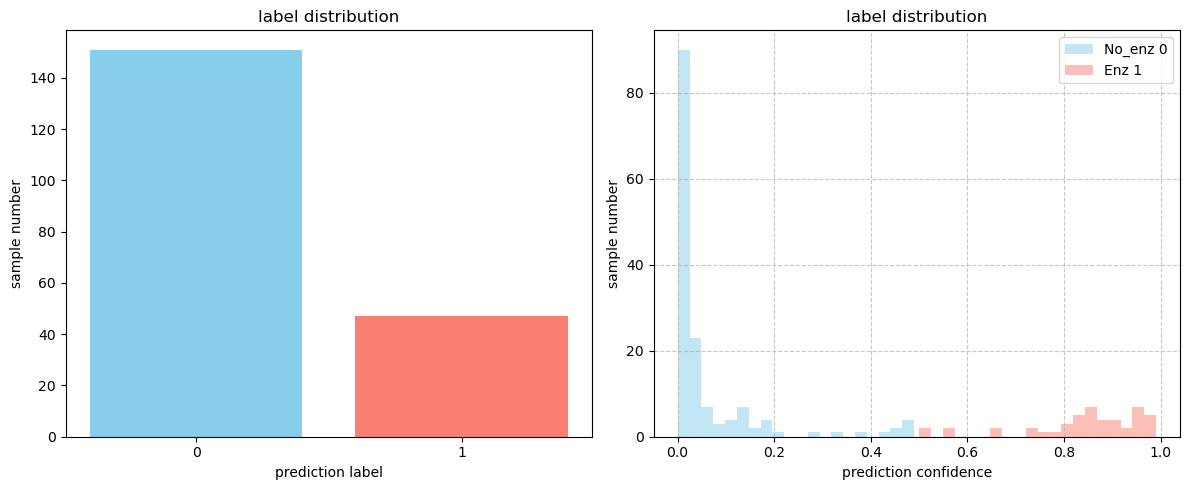


预测结果统计信息:
      count      mean       std       min       25%       50%       75%  \
预测标签                                                                      
0     151.0  0.060730  0.109652  0.000679  0.005435  0.017031  0.047891   
1      47.0  0.843526  0.125922  0.500392  0.806226  0.863469  0.939352   

           max  
预测标签            
0     0.489415  
1     0.990535  


In [23]:
import matplotlib.pyplot as plt

y_pred_uniprot_metagenome = xgb_model.predict(enz_test_uniprot_metagenome)
y_pred_proba_uniprot_metagenome = xgb_model.predict_proba(enz_test_uniprot_metagenome)[:, 1]

# 统计预测结果中1和0的数量
unique, counts = np.unique(y_pred_uniprot_metagenome, return_counts=True)
print("预测结果统计:")
for value, count in zip(unique, counts):
    print(f"标签 {value}: {count} 个样本")

# 创建DataFrame存储结果
results_df = pd.DataFrame({
    '预测标签': y_pred_uniprot_metagenome,
    '预测置信度': y_pred_proba_uniprot_metagenome
})

# 可视化标签分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(unique, counts, color=['skyblue', 'salmon'])
plt.xlabel('prediction label')
plt.ylabel('sample number')
plt.title('label distribution')
plt.xticks(unique)

# 可视化置信度分布
plt.subplot(1, 2, 2)
plt.hist(results_df[results_df['预测标签'] == 0]['预测置信度'], 
         bins=20, alpha=0.5, color='skyblue', label='No_enz 0')
plt.hist(results_df[results_df['预测标签'] == 1]['预测置信度'], 
         bins=20, alpha=0.5, color='salmon', label='Enz 1')
plt.xlabel('prediction confidence')
plt.ylabel('sample number')
plt.title('label distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 显示预测结果的基本统计信息
print("\n预测结果统计信息:")
print(results_df.groupby('预测标签')['预测置信度'].describe())


In [16]:
# 获取标签为1的样本及其置信度
enz_samples = results_df[results_df['预测标签'] == 1]
print("\n标签为1的样本数量:", len(enz_samples))
print("\n标签为1的样本及其置信度:")
print(enz_samples.sort_values('预测置信度', ascending=False).head(10))



标签为1的样本数量: 47

标签为1的样本及其置信度:
     预测标签     预测置信度
158     1  0.990535
122     1  0.983527
155     1  0.976086
132     1  0.975137
162     1  0.970942
176     1  0.962159
174     1  0.961050
197     1  0.960251
153     1  0.956229
154     1  0.952643


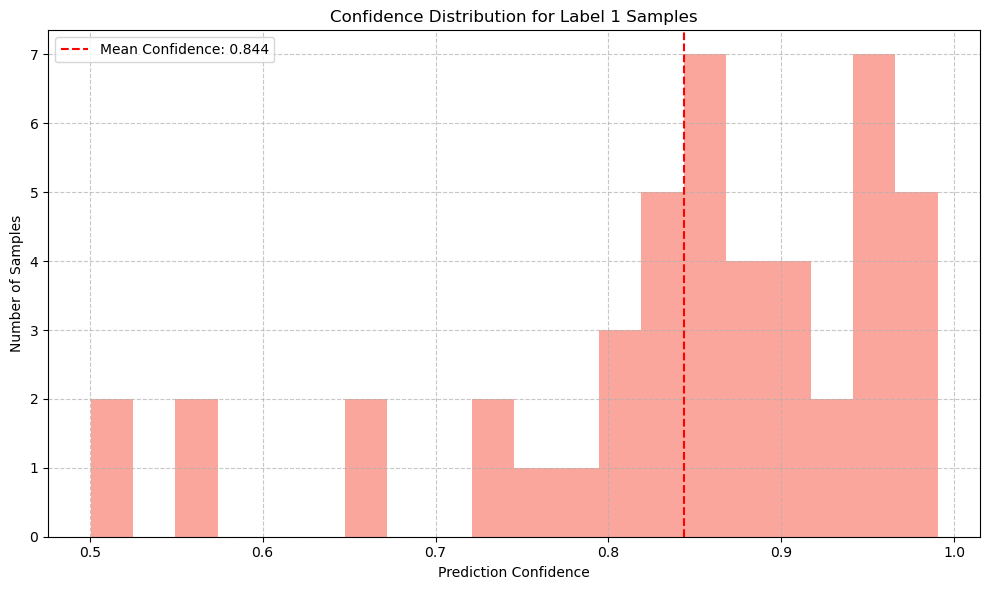


Confidence Statistics for Label 1 Samples:
count    47.000000
mean      0.843526
std       0.125922
min       0.500392
25%       0.806226
50%       0.863469
75%       0.939352
max       0.990535
Name: 预测置信度, dtype: float64


In [19]:
# Visualize confidence distribution for label 1 samples only
plt.figure(figsize=(10, 6))
plt.hist(enz_samples['预测置信度'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Prediction Confidence')
plt.ylabel('Number of Samples')
plt.title('Confidence Distribution for Label 1 Samples')
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical line at mean confidence
mean_confidence = enz_samples['预测置信度'].mean()
plt.axvline(x=mean_confidence, color='red', linestyle='--', 
            label=f'Mean Confidence: {mean_confidence:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# Display basic statistics of confidence for label 1 samples
print("\nConfidence Statistics for Label 1 Samples:")
print(enz_samples['预测置信度'].describe())



置信度大于等于0.9的样本数量: 18

高置信度样本详情:
     预测标签     预测置信度
158     1  0.990535
122     1  0.983527
155     1  0.976086
132     1  0.975137
162     1  0.970942
176     1  0.962159
174     1  0.961050
197     1  0.960251
153     1  0.956229
154     1  0.952643
114     1  0.947434
138     1  0.945941
120     1  0.932763
150     1  0.920708
177     1  0.916158
179     1  0.912181
189     1  0.911177
117     1  0.900319


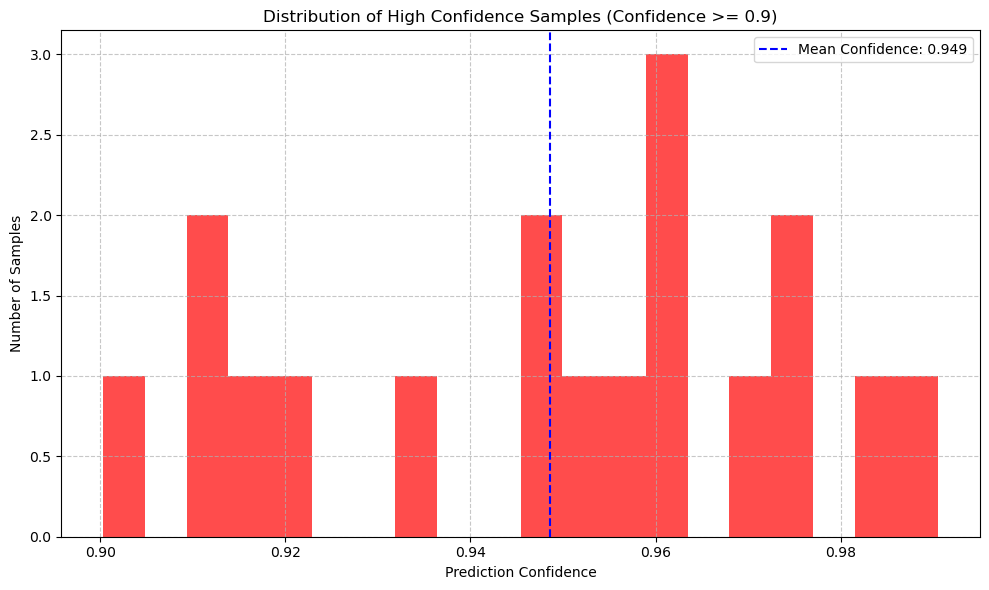


高置信度样本统计信息:
count    18.000000
mean      0.948624
std       0.027261
min       0.900319
25%       0.923722
50%       0.954436
75%       0.968746
max       0.990535
Name: 预测置信度, dtype: float64


In [20]:
# 筛选置信度大于等于0.9的样本
high_confidence_samples = enz_samples[enz_samples['预测置信度'] >= 0.9]

print(f"\n置信度大于等于0.9的样本数量: {len(high_confidence_samples)}")
print("\n高置信度样本详情:")
print(high_confidence_samples.sort_values('预测置信度', ascending=False))

# 可视化高置信度样本的分布
plt.figure(figsize=(10, 6))
plt.hist(high_confidence_samples['预测置信度'], bins=20, color='red', alpha=0.7)
plt.xlabel('Prediction Confidence')
plt.ylabel('Number of Samples')
plt.title('Distribution of High Confidence Samples (Confidence >= 0.9)')
plt.grid(True, linestyle='--', alpha=0.7)

# 添加平均置信度线
mean_high_confidence = high_confidence_samples['预测置信度'].mean()
plt.axvline(x=mean_high_confidence, color='blue', linestyle='--', 
            label=f'Mean Confidence: {mean_high_confidence:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# 显示高置信度样本的基本统计信息
print("\n高置信度样本统计信息:")
print(high_confidence_samples['预测置信度'].describe())

In [21]:
high_confidence_samples

,预测标签,预测置信度
114,1,0.947434
117,1,0.900319
120,1,0.932763
122,1,0.983527
132,1,0.975137
138,1,0.945941
150,1,0.920708
153,1,0.956229
154,1,0.952643
155,1,0.976086


预测结果统计:
标签 0: 1369 个样本
标签 1: 6933 个样本


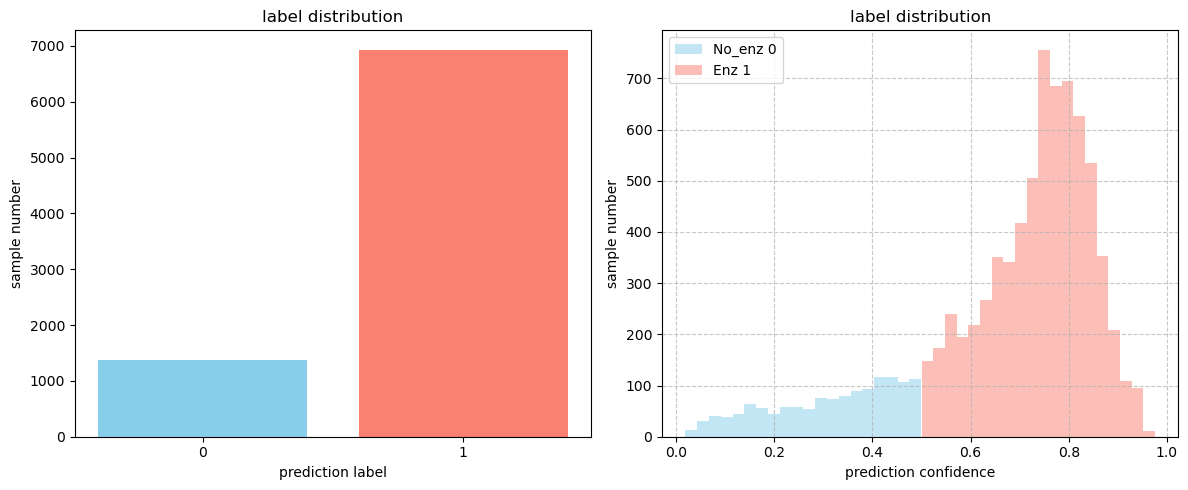


预测结果统计信息:
       count      mean       std       min       25%       50%       75%  \
预测标签                                                                       
0     1369.0  0.316542  0.128433  0.018937  0.214463  0.342096  0.424988   
1     6933.0  0.742643  0.100742  0.500024  0.677146  0.757506  0.816098   

           max  
预测标签            
0     0.499425  
1     0.975614  


In [13]:
import matplotlib.pyplot as plt

y_pred_rdrp = xgb_model.predict(enz_test_rdrp)
y_pred_proba_rdrp = xgb_model.predict_proba(enz_test_rdrp)[:, 1]

# 统计预测结果中1和0的数量
unique, counts = np.unique(y_pred_rdrp, return_counts=True)
print("预测结果统计:")
for value, count in zip(unique, counts):
    print(f"标签 {value}: {count} 个样本")

# 创建DataFrame存储结果
results_df = pd.DataFrame({
    '预测标签': y_pred_rdrp,
    '预测置信度': y_pred_proba_rdrp
})

# 可视化标签分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(unique, counts, color=['skyblue', 'salmon'])
plt.xlabel('prediction label')
plt.ylabel('sample number')
plt.title('label distribution')
plt.xticks(unique)

# 可视化置信度分布
plt.subplot(1, 2, 2)
plt.hist(results_df[results_df['预测标签'] == 0]['预测置信度'], 
         bins=20, alpha=0.5, color='skyblue', label='No_enz 0')
plt.hist(results_df[results_df['预测标签'] == 1]['预测置信度'], 
         bins=20, alpha=0.5, color='salmon', label='Enz 1')
plt.xlabel('prediction confidence')
plt.ylabel('sample number')
plt.title('label distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 显示预测结果的基本统计信息
print("\n预测结果统计信息:")
print(results_df.groupby('预测标签')['预测置信度'].describe())

In [16]:
results_df

,预测标签,非酶概率,酶概率
0,1,0.254444,0.745556
1,0,0.683355,0.316645
2,1,0.324449,0.675551
3,1,0.085715,0.914285
4,1,0.226633,0.773367
...,...,...,...
8297,0,0.849603,0.150397
8298,0,0.861931,0.138069
8299,0,0.860083,0.139917
8300,0,0.861931,0.138069


预测结果统计:
标签 0: 1369 个样本
标签 1: 6933 个样本


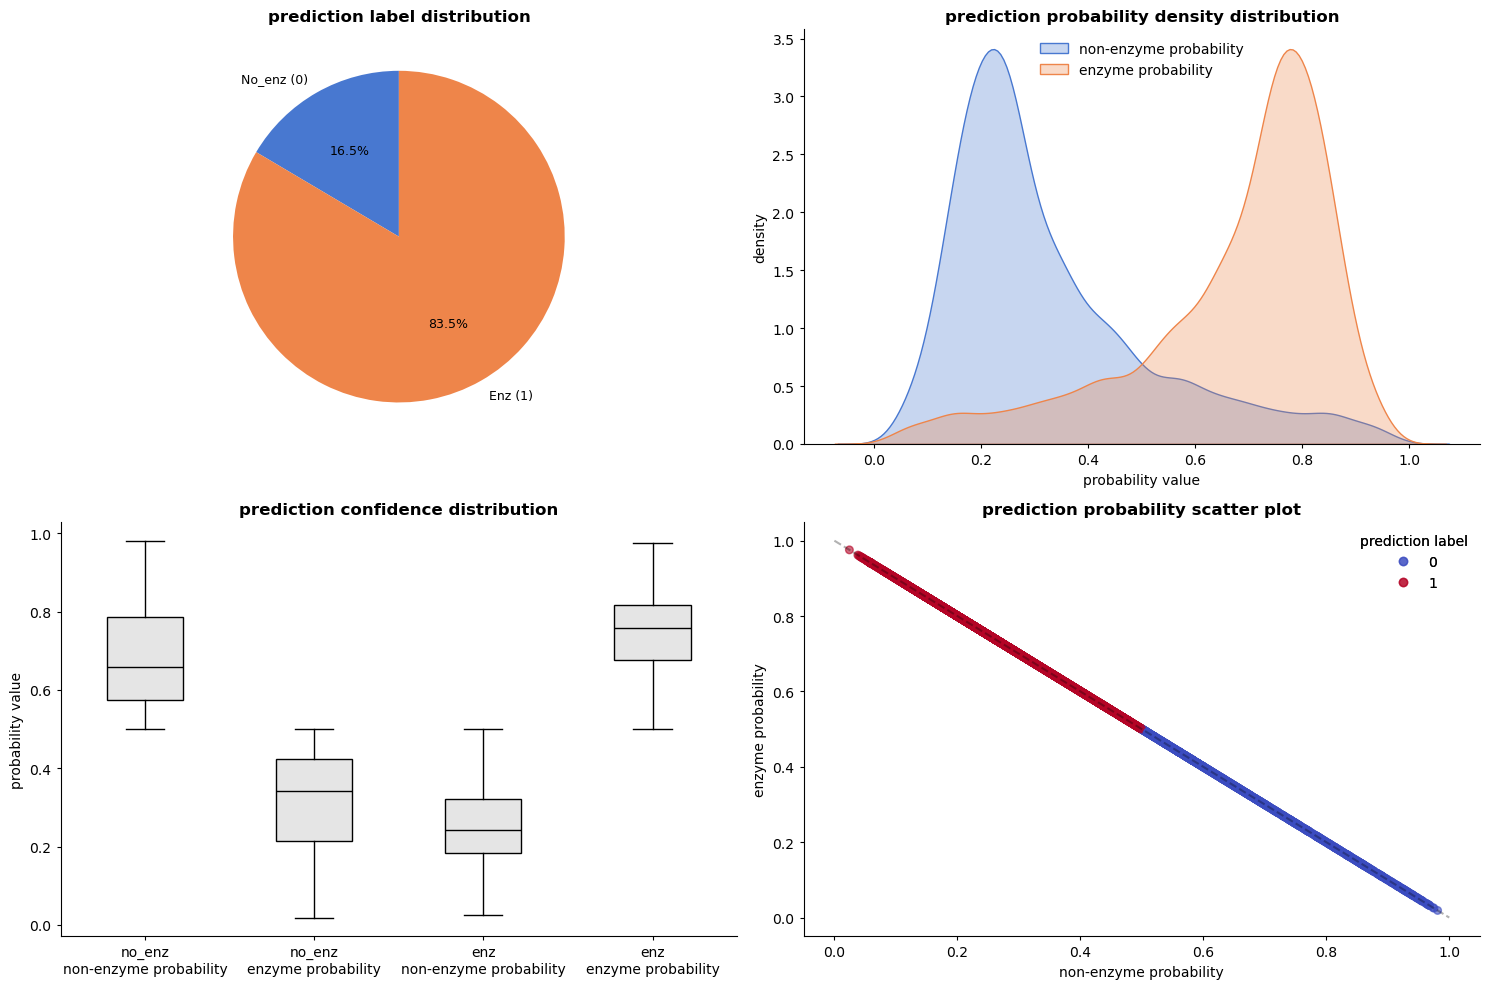


预测结果统计信息:
非酶(0)样本的概率统计:
              非酶概率          酶概率
count  1369.000000  1369.000000
mean      0.683458     0.316542
std       0.128433     0.128433
min       0.500575     0.018937
25%       0.575012     0.214463
50%       0.657904     0.342096
75%       0.785537     0.424988
max       0.981063     0.499425

酶(1)样本的概率统计:
              非酶概率          酶概率
count  6933.000000  6933.000000
mean      0.257357     0.742643
std       0.100742     0.100742
min       0.024386     0.500024
25%       0.183902     0.677146
50%       0.242494     0.757506
75%       0.322854     0.816098
max       0.499976     0.975614

高置信度预测比例: 30.17%
低置信度预测比例: 15.36%


In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 设置Nature风格的绘图参数
plt.style.use('default')
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['xtick.major.width'] = 0.8
mpl.rcParams['ytick.major.width'] = 0.8
mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.frameon'] = False

y_pred_rdrp = xgb_model.predict(enz_test_rdrp)
# 获取预测为非酶(0)和酶(1)的概率值
y_pred_proba_rdrp_0 = xgb_model.predict_proba(enz_test_rdrp)[:, 0]  # 非酶的概率
y_pred_proba_rdrp_1 = xgb_model.predict_proba(enz_test_rdrp)[:, 1]  # 酶的概率

# 统计预测结果中1和0的数量
unique, counts = np.unique(y_pred_rdrp, return_counts=True)
print("预测结果统计:")
for value, count in zip(unique, counts):
    print(f"标签 {value}: {count} 个样本")

# 创建DataFrame存储结果
results_df = pd.DataFrame({
    '预测标签': y_pred_rdrp,
    '非酶概率': y_pred_proba_rdrp_0,
    '酶概率': y_pred_proba_rdrp_1
})

# 计算置信度阈值分布
confidence_thresholds = np.arange(0.1, 1.0, 0.1)
precision_values = []
recall_values = []
# 创建真实标签，全部为1
y_true = np.ones_like(y_pred_rdrp)
for threshold in confidence_thresholds:
    # 使用阈值调整预测结果
    adjusted_pred = (y_pred_proba_rdrp_1 >= threshold).astype(int)
    # 计算每个阈值下的精确率和召回率
    precision = precision_score(y_true, adjusted_pred)
    recall = recall_score(y_true, adjusted_pred)
    precision_values.append(precision)
    recall_values.append(recall)

# 可视化标签分布和概率分析
fig = plt.figure(figsize=(15, 10))

# 第一个子图：标签分布饼图
ax1 = plt.subplot(2, 2, 1)
wedges, texts, autotexts = ax1.pie(counts, labels=['No_enz (0)', 'Enz (1)'], 
                                   autopct='%1.1f%%', startangle=90,
                                   colors=['#4878D0', '#EE854A'])
for text in texts + autotexts:
    text.set_fontsize(9)
ax1.set_title('prediction label distribution', fontsize=12, fontweight='bold')

# 第二个子图：预测概率密度分布
ax2 = plt.subplot(2, 2, 2)
sns.kdeplot(results_df['非酶概率'], ax=ax2, color='#4878D0', label='non-enzyme probability', fill=True, alpha=0.3)
sns.kdeplot(results_df['酶概率'], ax=ax2, color='#EE854A', label='enzyme probability', fill=True, alpha=0.3)
ax2.set_xlabel('probability value', fontsize=10)
ax2.set_ylabel('density', fontsize=10)
ax2.set_title('prediction probability density distribution', fontsize=12, fontweight='bold')
ax2.legend(loc='upper center')

# 第三个子图：预测置信度箱线图
ax3 = plt.subplot(2, 2, 3)
boxdata = [
    results_df[results_df['预测标签'] == 0]['非酶概率'],
    results_df[results_df['预测标签'] == 0]['酶概率'],
    results_df[results_df['预测标签'] == 1]['非酶概率'],
    results_df[results_df['预测标签'] == 1]['酶概率']
]
box = ax3.boxplot(boxdata, patch_artist=True, 
                 boxprops=dict(facecolor='#E5E5E5'),
                 medianprops=dict(color='black'),
                 flierprops=dict(marker='o', markersize=3))
ax3.set_xticklabels(['no_enz\nnon-enzyme probability', 'no_enz\nenzyme probability', 'enz\nnon-enzyme probability', 'enz\nenzyme probability'])
ax3.set_ylabel('probability value', fontsize=10)
ax3.set_title('prediction confidence distribution', fontsize=12, fontweight='bold')

# 第四个子图：概率散点图
ax4 = plt.subplot(2, 2, 4)
scatter = ax4.scatter(results_df['非酶概率'], results_df['酶概率'], 
                     c=results_df['预测标签'], cmap='coolwarm', alpha=0.6, s=30)
ax4.set_xlabel('non-enzyme probability', fontsize=10)
ax4.set_ylabel('enzyme probability', fontsize=10)
ax4.set_title('prediction probability scatter plot', fontsize=12, fontweight='bold')
ax4.plot([0, 1], [1, 0], 'k--', alpha=0.3)  # 添加概率和为1的参考线
legend1 = ax4.legend(*scatter.legend_elements(), title="prediction label")
ax4.add_artist(legend1)

plt.tight_layout()
plt.show()

# 显示预测结果的基本统计信息
print("\n预测结果统计信息:")
print("非酶(0)样本的概率统计:")
print(results_df[results_df['预测标签'] == 0][['非酶概率', '酶概率']].describe())
print("\n酶(1)样本的概率统计:")
print(results_df[results_df['预测标签'] == 1][['非酶概率', '酶概率']].describe())

# 计算高置信度和低置信度预测的比例
high_confidence = results_df[(results_df['非酶概率'] >= 0.8) | (results_df['酶概率'] >= 0.8)]
low_confidence = results_df[(results_df['非酶概率'] < 0.6) & (results_df['酶概率'] < 0.6)]

print(f"\n高置信度预测比例: {len(high_confidence)/len(results_df)*100:.2f}%")
print(f"低置信度预测比例: {len(low_confidence)/len(results_df)*100:.2f}%")

In [40]:
y_pred_rdrp2 = xgb_model.predict(enz_test_rdrp2)
y_pred_proba_rdrp2 = xgb_model.predict_proba(enz_test_rdrp2)[:, 1]

预测结果统计:
标签 0: 1061 个样本
标签 1: 777 个样本


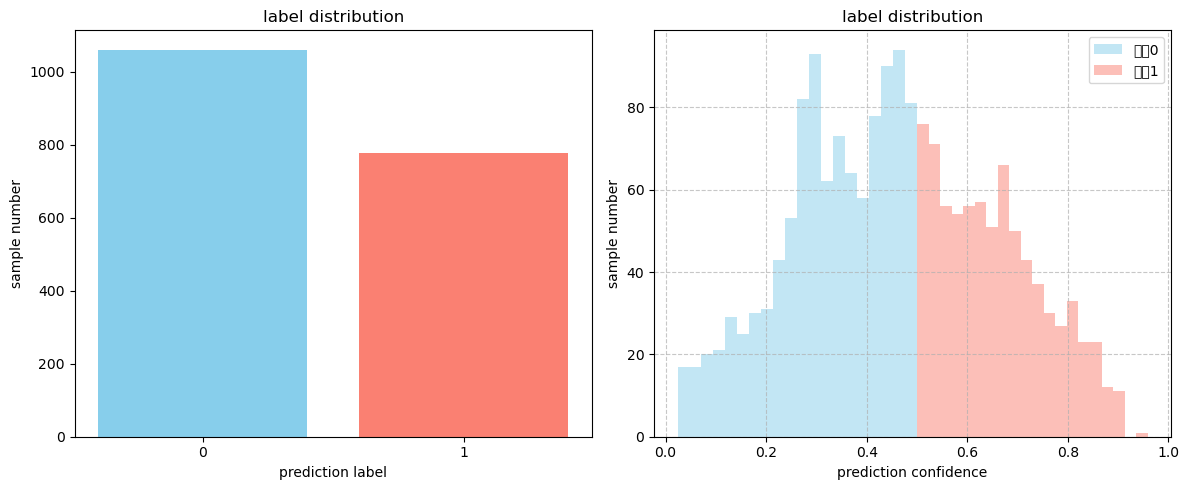


预测结果统计信息:
       count      mean       std       min       25%       50%       75%  \
预测标签                                                                       
0     1061.0  0.325173  0.118801  0.023736  0.252860  0.335931  0.427949   
1      777.0  0.656585  0.106562  0.500109  0.565335  0.647575  0.730708   

           max  
预测标签            
0     0.499837  
1     0.958737  


In [41]:
# 统计预测结果中1和0的数量
unique, counts = np.unique(y_pred_rdrp2, return_counts=True)
print("预测结果统计:")
for value, count in zip(unique, counts):
    print(f"标签 {value}: {count} 个样本")

# 创建DataFrame存储结果
results_df = pd.DataFrame({
    '预测标签': y_pred_rdrp2,
    '预测置信度': y_pred_proba_rdrp2
})

# 可视化标签分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(unique, counts, color=['skyblue', 'salmon'])
plt.xlabel('prediction label')
plt.ylabel('sample number')
plt.title('label distribution')
plt.xticks(unique)

# 可视化置信度分布
plt.subplot(1, 2, 2)
plt.hist(results_df[results_df['预测标签'] == 0]['预测置信度'], 
         bins=20, alpha=0.5, color='skyblue', label='标签0')
plt.hist(results_df[results_df['预测标签'] == 1]['预测置信度'], 
         bins=20, alpha=0.5, color='salmon', label='标签1')
plt.xlabel('prediction confidence')
plt.ylabel('sample number')
plt.title('label distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 显示预测结果的基本统计信息
print("\n预测结果统计信息:")
print(results_df.groupby('预测标签')['预测置信度'].describe())

In [36]:
1369/(1369+6933)

0.16490002409058058

In [31]:
# 统计预测结果中1和0的数量
unique, counts = np.unique(y_pred_rdrp, return_counts=True)
print("预测结果统计:")
for value, count in zip(unique, counts):
    print(f"标签 {value}: {count} 个样本")

预测结果统计:
标签 0: 1369 个样本
标签 1: 6933 个样本


In [32]:
y_pred_proba_rdrp

array([0.74555606, 0.31664518, 0.675551  , ..., 0.13991734, 0.13806932,
       0.07656093], dtype=float32)


预测结果示例:
   样本索引  真实标签  预测标签     预测置信度
0     0   0.0     0  0.023136
1     1   1.0     1  0.975947
2     2   1.0     1  0.996706
3     3   1.0     1  0.978726
4     4   1.0     1  0.982761
5     5   0.0     0  0.015659
6     6   0.0     0  0.007870
7     7   0.0     0  0.082968
8     8   0.0     0  0.017619
9     9   1.0     0  0.250002
预测结果已保存到 'prediction_results.csv'


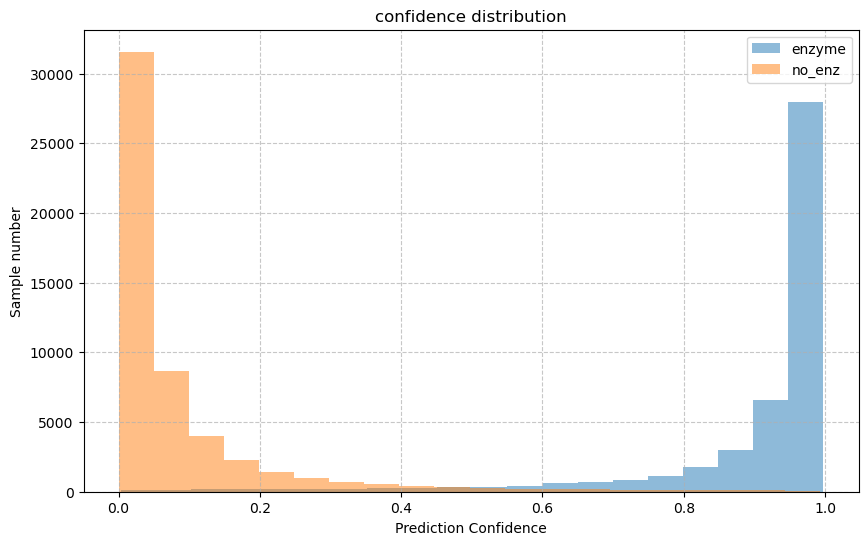

In [18]:
# 保存每个样本的预测置信度
import pandas as pd

# 创建一个DataFrame来存储测试集的预测结果
results_df = pd.DataFrame({
    '样本索引': range(len(y_test)),
    '真实标签': y_test,
    '预测标签': y_pred,
    '预测置信度': y_pred_proba
})

# 显示前几行结果
print("\n预测结果示例:")
print(results_df.head(10))

# 可选：保存结果到CSV文件
results_df.to_csv('prediction_results.csv', index=False)
print("预测结果已保存到 'prediction_results.csv'")

# 可视化预测置信度分布
plt.figure(figsize=(10, 6))
plt.hist(results_df[results_df['真实标签'] == 1]['预测置信度'], alpha=0.5, bins=20, label='enzyme')
plt.hist(results_df[results_df['真实标签'] == 0]['预测置信度'], alpha=0.5, bins=20, label='no_enz')
plt.xlabel('Prediction Confidence')
plt.ylabel('Sample number')
plt.title('confidence distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [19]:
# # 划分训练集和测试集
# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import GridSearchCV

# print("划分训练集和测试集...")
# X_train, X_test, y_train, y_test = train_test_split(
#     all_data.numpy(), all_labels.numpy(), 
#     test_size=0.2, 
#     random_state=42, 
#     stratify=all_labels.numpy()  # 确保训练集和测试集中的类别比例一致
# )

# print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")
# print(f"训练集标签分布: 酶({np.sum(y_train == 1)})，非酶({np.sum(y_train == 0)})")
# print(f"测试集标签分布: 酶({np.sum(y_test == 1)})，非酶({np.sum(y_test == 0)})")

# # 创建XGBoost模型
# print("训练XGBoost模型...")
# xgb_model = XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=5,
#     min_child_weight=1,
#     gamma=0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='binary:logistic',
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='logloss'
# )

# # 执行5折交叉验证
# print("\n执行5折交叉验证...")
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_accuracy = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='accuracy')
# cv_precision = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='precision')
# cv_recall = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='recall')
# cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1')
# cv_roc_auc = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='roc_auc')

# print("\n交叉验证结果:")
# print(f"准确率 (Accuracy): {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
# print(f"精确率 (Precision): {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
# print(f"召回率 (Recall): {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
# print(f"F1分数: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
# print(f"ROC AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# # 在完整训练集上训练模型
# xgb_model.fit(X_train, y_train)

# # 在测试集上进行预测
# y_pred = xgb_model.predict(X_test)
# y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# # 评估模型性能
# print("\n最终模型评估结果:")
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print(f"准确率 (Accuracy): {accuracy:.4f}")
# print(f"精确率 (Precision): {precision:.4f}")
# print(f"召回率 (Recall): {recall:.4f}")
# print(f"F1分数: {f1:.4f}")
# print(f"ROC AUC: {roc_auc:.4f}")


混淆矩阵:
[[50974  1433]
 [ 2057 43415]]

分类报告:
              precision    recall  f1-score   support

          非酶       0.96      0.97      0.97     52407
           酶       0.97      0.95      0.96     45472

    accuracy                           0.96     97879
   macro avg       0.96      0.96      0.96     97879
weighted avg       0.96      0.96      0.96     97879



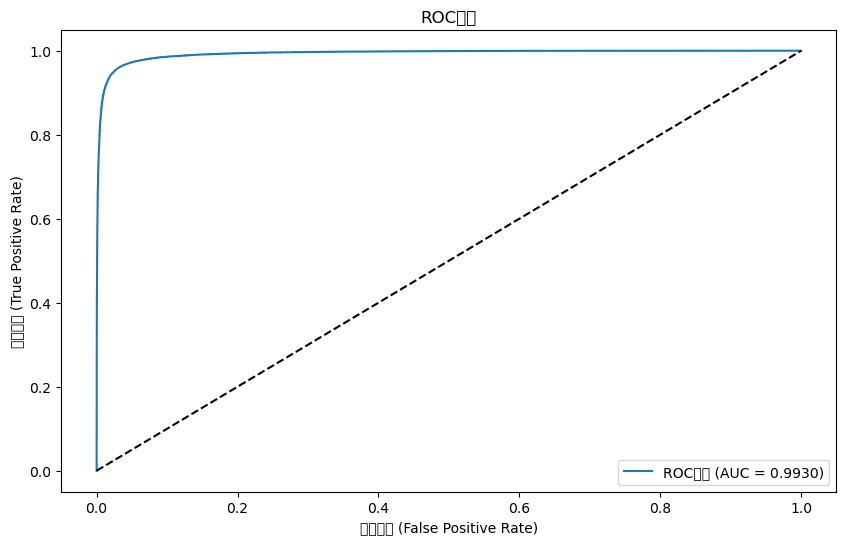

In [20]:
# 打印混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(cm)

# 打印详细分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=['非酶', '酶']))

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC曲线 (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('假阳性率 (False Positive Rate)')
plt.ylabel('真阳性率 (True Positive Rate)')
plt.title('ROC曲线')
plt.legend(loc='lower right')
plt.show()

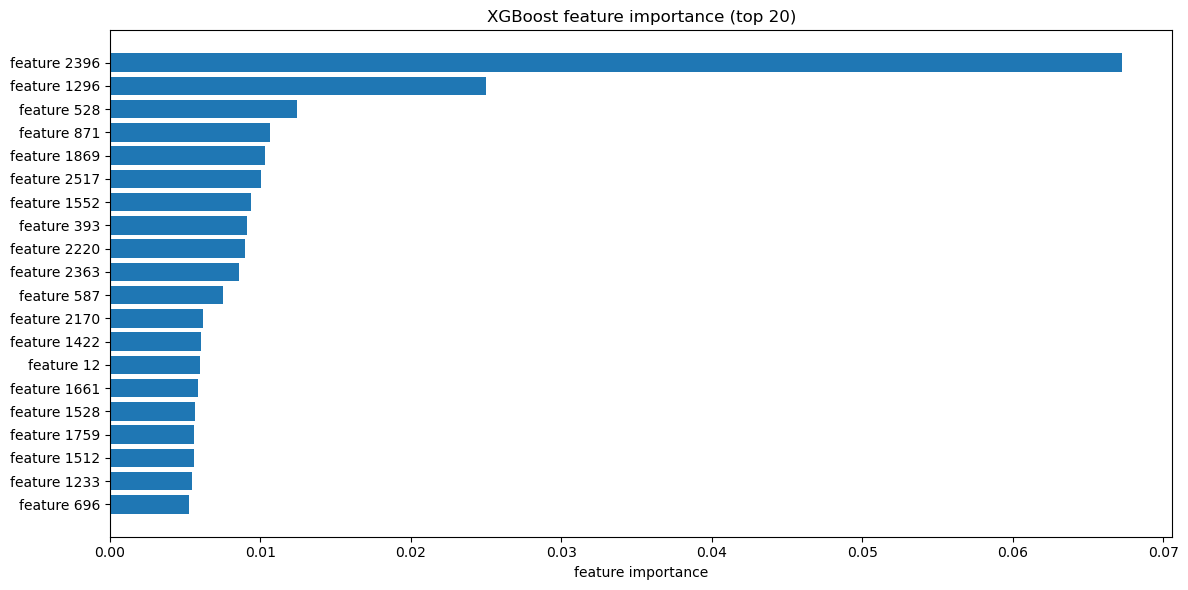

In [21]:
# 特征重要性分析
plt.figure(figsize=(12, 6))
feature_importance = xgb_model.feature_importances_
# 只显示前20个最重要的特征
indices = np.argsort(feature_importance)[-20:]
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [f'feature {i}' for i in indices])
plt.xlabel('feature importance')
plt.title('XGBoost feature importance (top 20)')
plt.tight_layout()
plt.show()